# Tutorial

This notebook shows an example Exploratory Data Analysis utilizing data-describe.

*Note: Part of this notebook uses optional dependencies for text analysis. To install these dependencies, run `pip install data-describe[nlp]`*

In [1]:
import data_describe as dd

/Users/richardtruong-chau/miniconda3/envs/test-env/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from google.protobuf.pyext import _message
/Users/richardtruong-chau/miniconda3/envs/test-env/lib/python3.7/site-packages/gensim/corpora/dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict
/Users/richardtruong-chau/miniconda3/envs/test-env/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


## Data
This tutorial uses toy datasets from sklearn.

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
dat = load_boston()
df = pd.DataFrame(dat['data'], columns=dat['feature_names'])
df['price'] = dat['target']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Overview

[Column Descriptions](https://scikit-learn.org/stable/datasets/index.html#boston-dataset):

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per \$10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in \$1000’s

In [5]:
df.shape

(506, 14)

First we inspect some of the overall statistics about the data. Some examples of interesting things to note:
- 93% of `CHAS` are the same value, zero
- `ZN` also has a high amount of zeros
- The mean of `TAX` is significantly higher than the median, suggesting this is right-skewed

In [6]:
dd.data_summary(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Mean,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531,22.5328
Standard Deviation,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106,9.1971
Median,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36,21.2
Min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
Max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50
# Zeros,0,372,0,471,0,0,0,0,0,0,0,0,0,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,0.4,73.52,26.09,93.08,4.55,0.59,8.5,0.99,26.09,26.09,27.67,23.91,0.59,3.16


We can also look at a visual representation of the data as a heatmap:

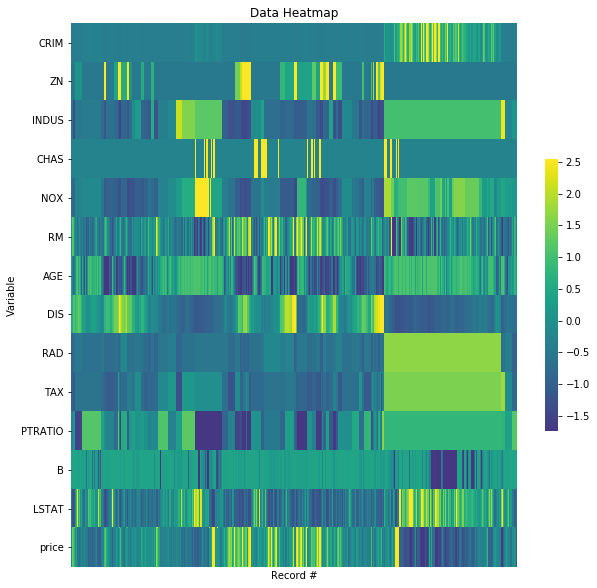

In [7]:
dd.data_heatmap(df)

There are some sections of the data which have exactly the same values for some columns. For example, `RAD` = 1.661245 between record number 356 ~ 487. Similar patterns appear for `INDUS` and `TAX`. Is this a sorting issue or is there something else going on? Some additional investigation into data collection may answer these questions.

We can also look at the correlations:

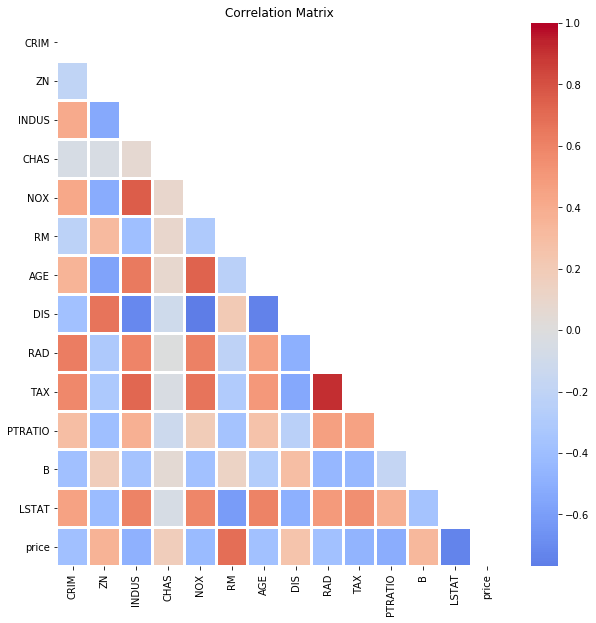

In [8]:
dd.correlation_matrix(df)

Features like `AGE` and `DIS` appear to be inversely correlated. `CHAS` doesn't appear to have strong correlation with any other feature.

It might also help to re-order the features for comparisons using the `cluster` argument.

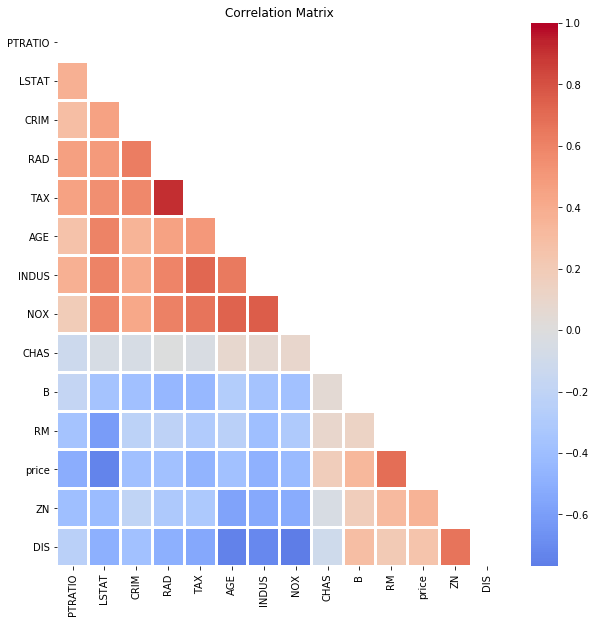

In [9]:
dd.correlation_matrix(df, cluster=True)

From this plot we can observe there are are two groups of inversely related features: `PTRATIO` to `NOX` and `B` to `DIS`.

## Data Inspection
We can also do some more detailed inspection of individual features. 

We can show histograms and violin plots of each numeric feature using the `dd.distribution` function.

Distribution Summary:
        Skew detected in 2 columns.
        Spikey histograms detected in 0 columns.

        Use the method plot_distribution("column_name") to view plots for each feature.

        Example:
            dist = DistributionWidget(data)
            dist.plot_distribution("column1")
        


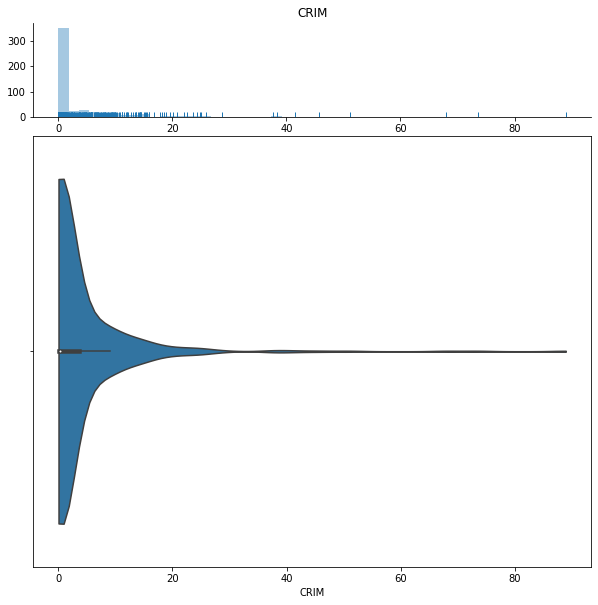

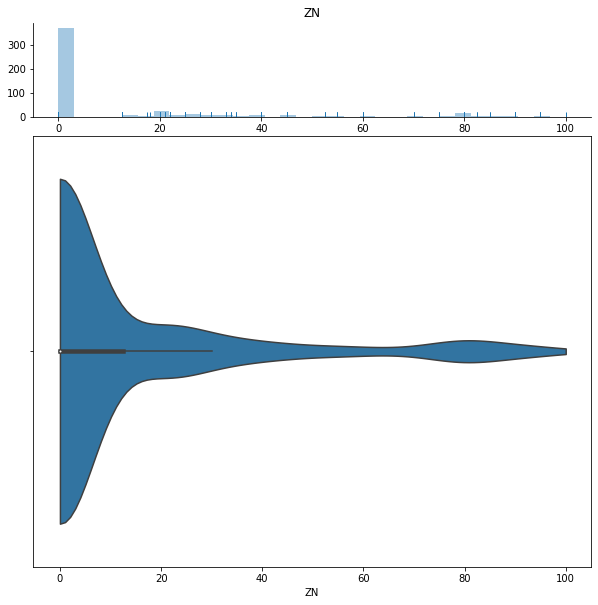

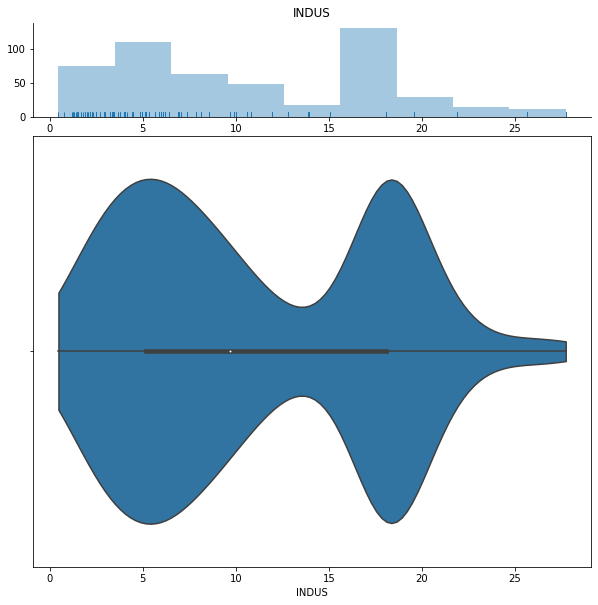

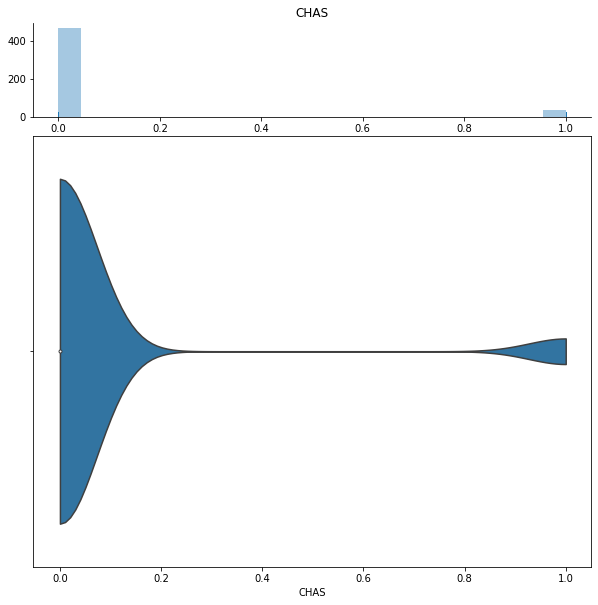

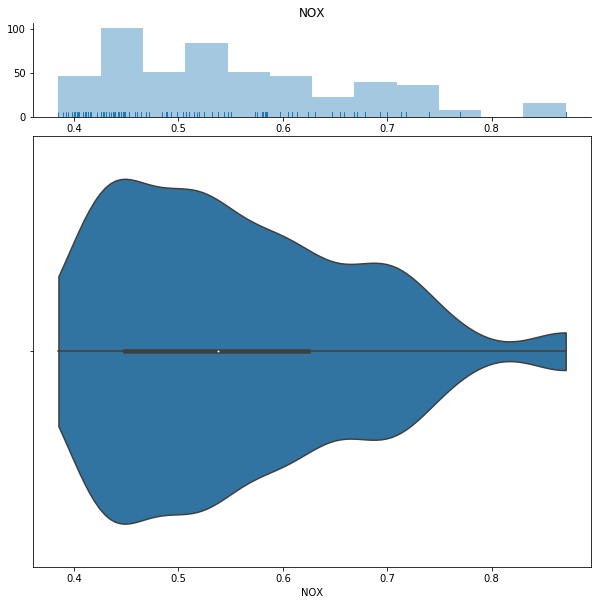

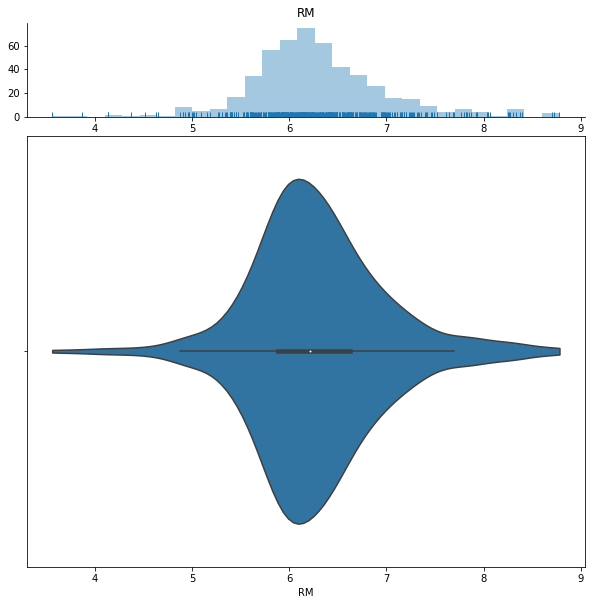

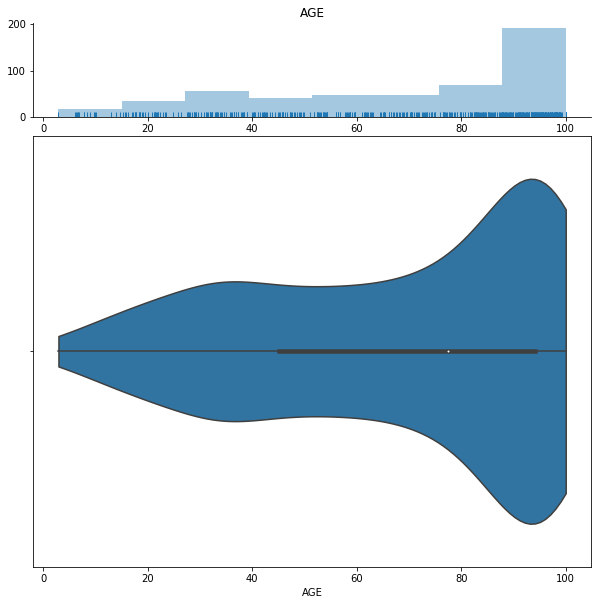

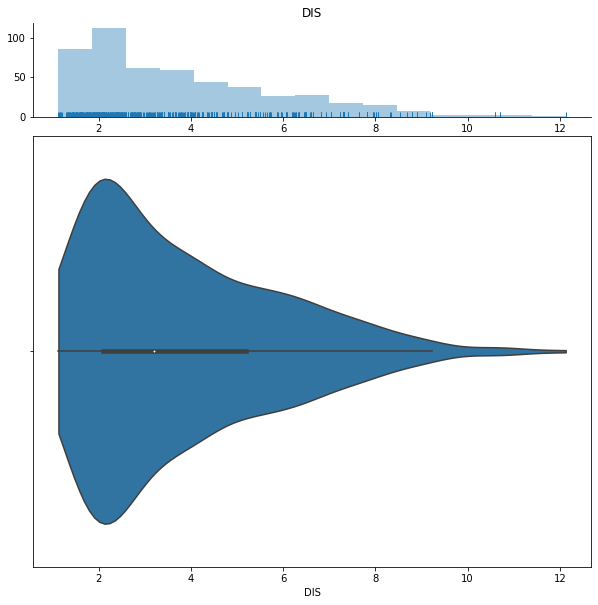

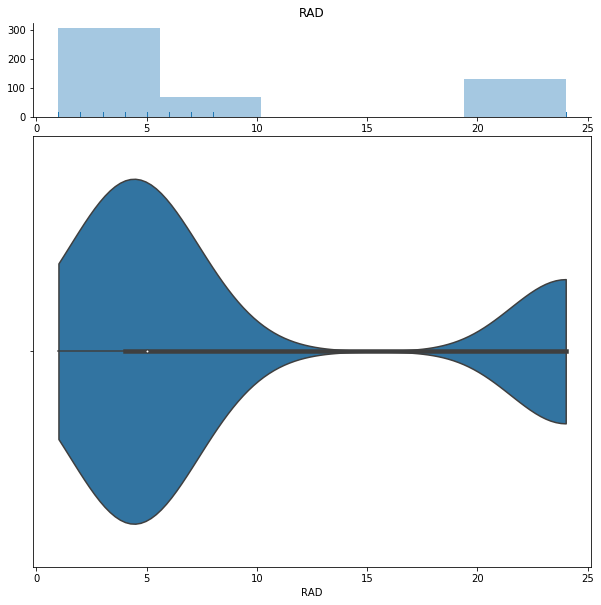

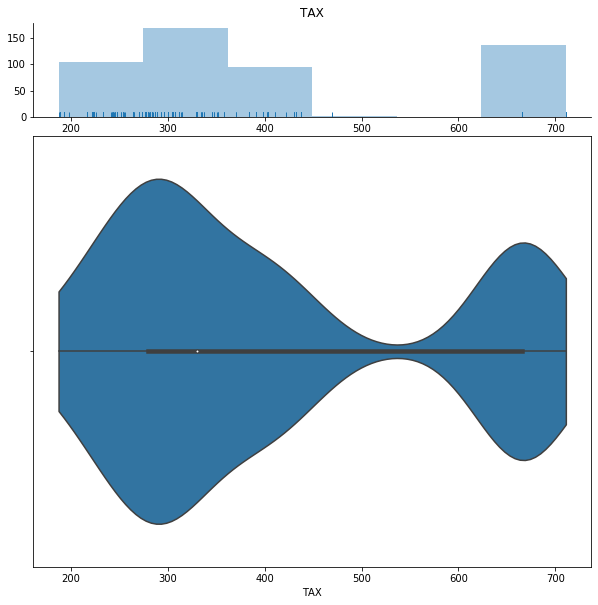

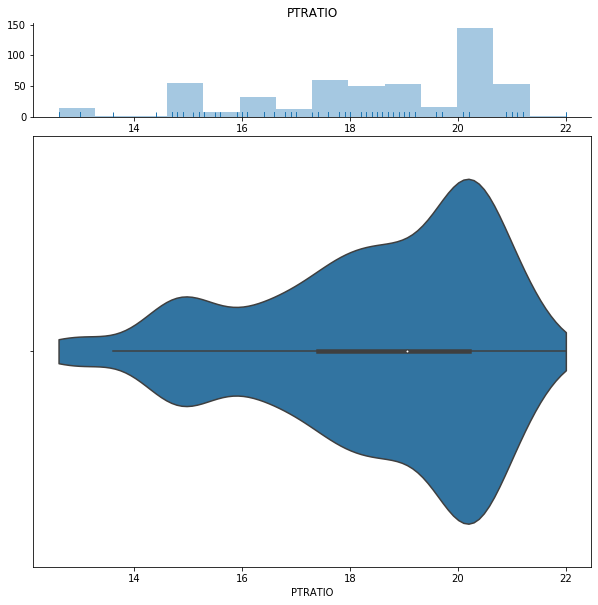

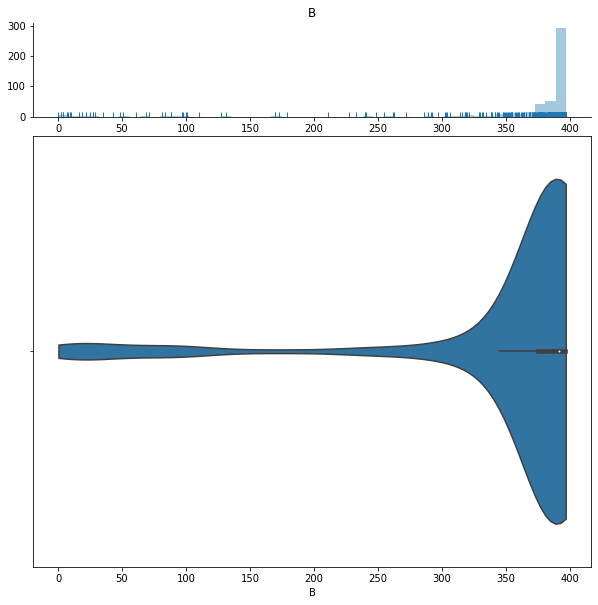

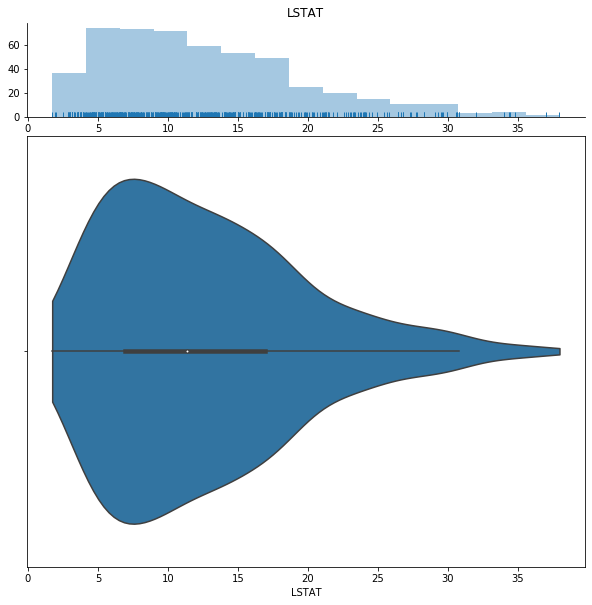

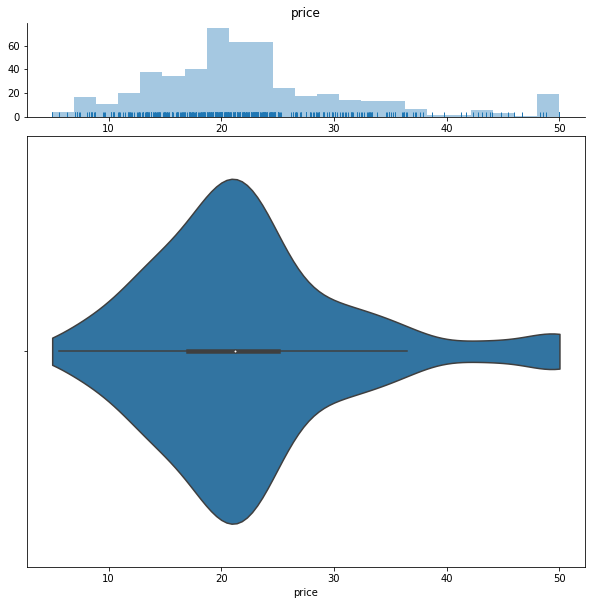

In [10]:
from IPython.display import display
# display is used to show plots from inside a loop
for col in df.columns:
    display(dd.distribution(df, plot_all=True).plot_distribution(col))

We can also look at bivariate distributions using scatter plots. In addition to plotting all pairs in a scatterplot matrix, we can also specify a filter for certain scatterplot diagnostic features.

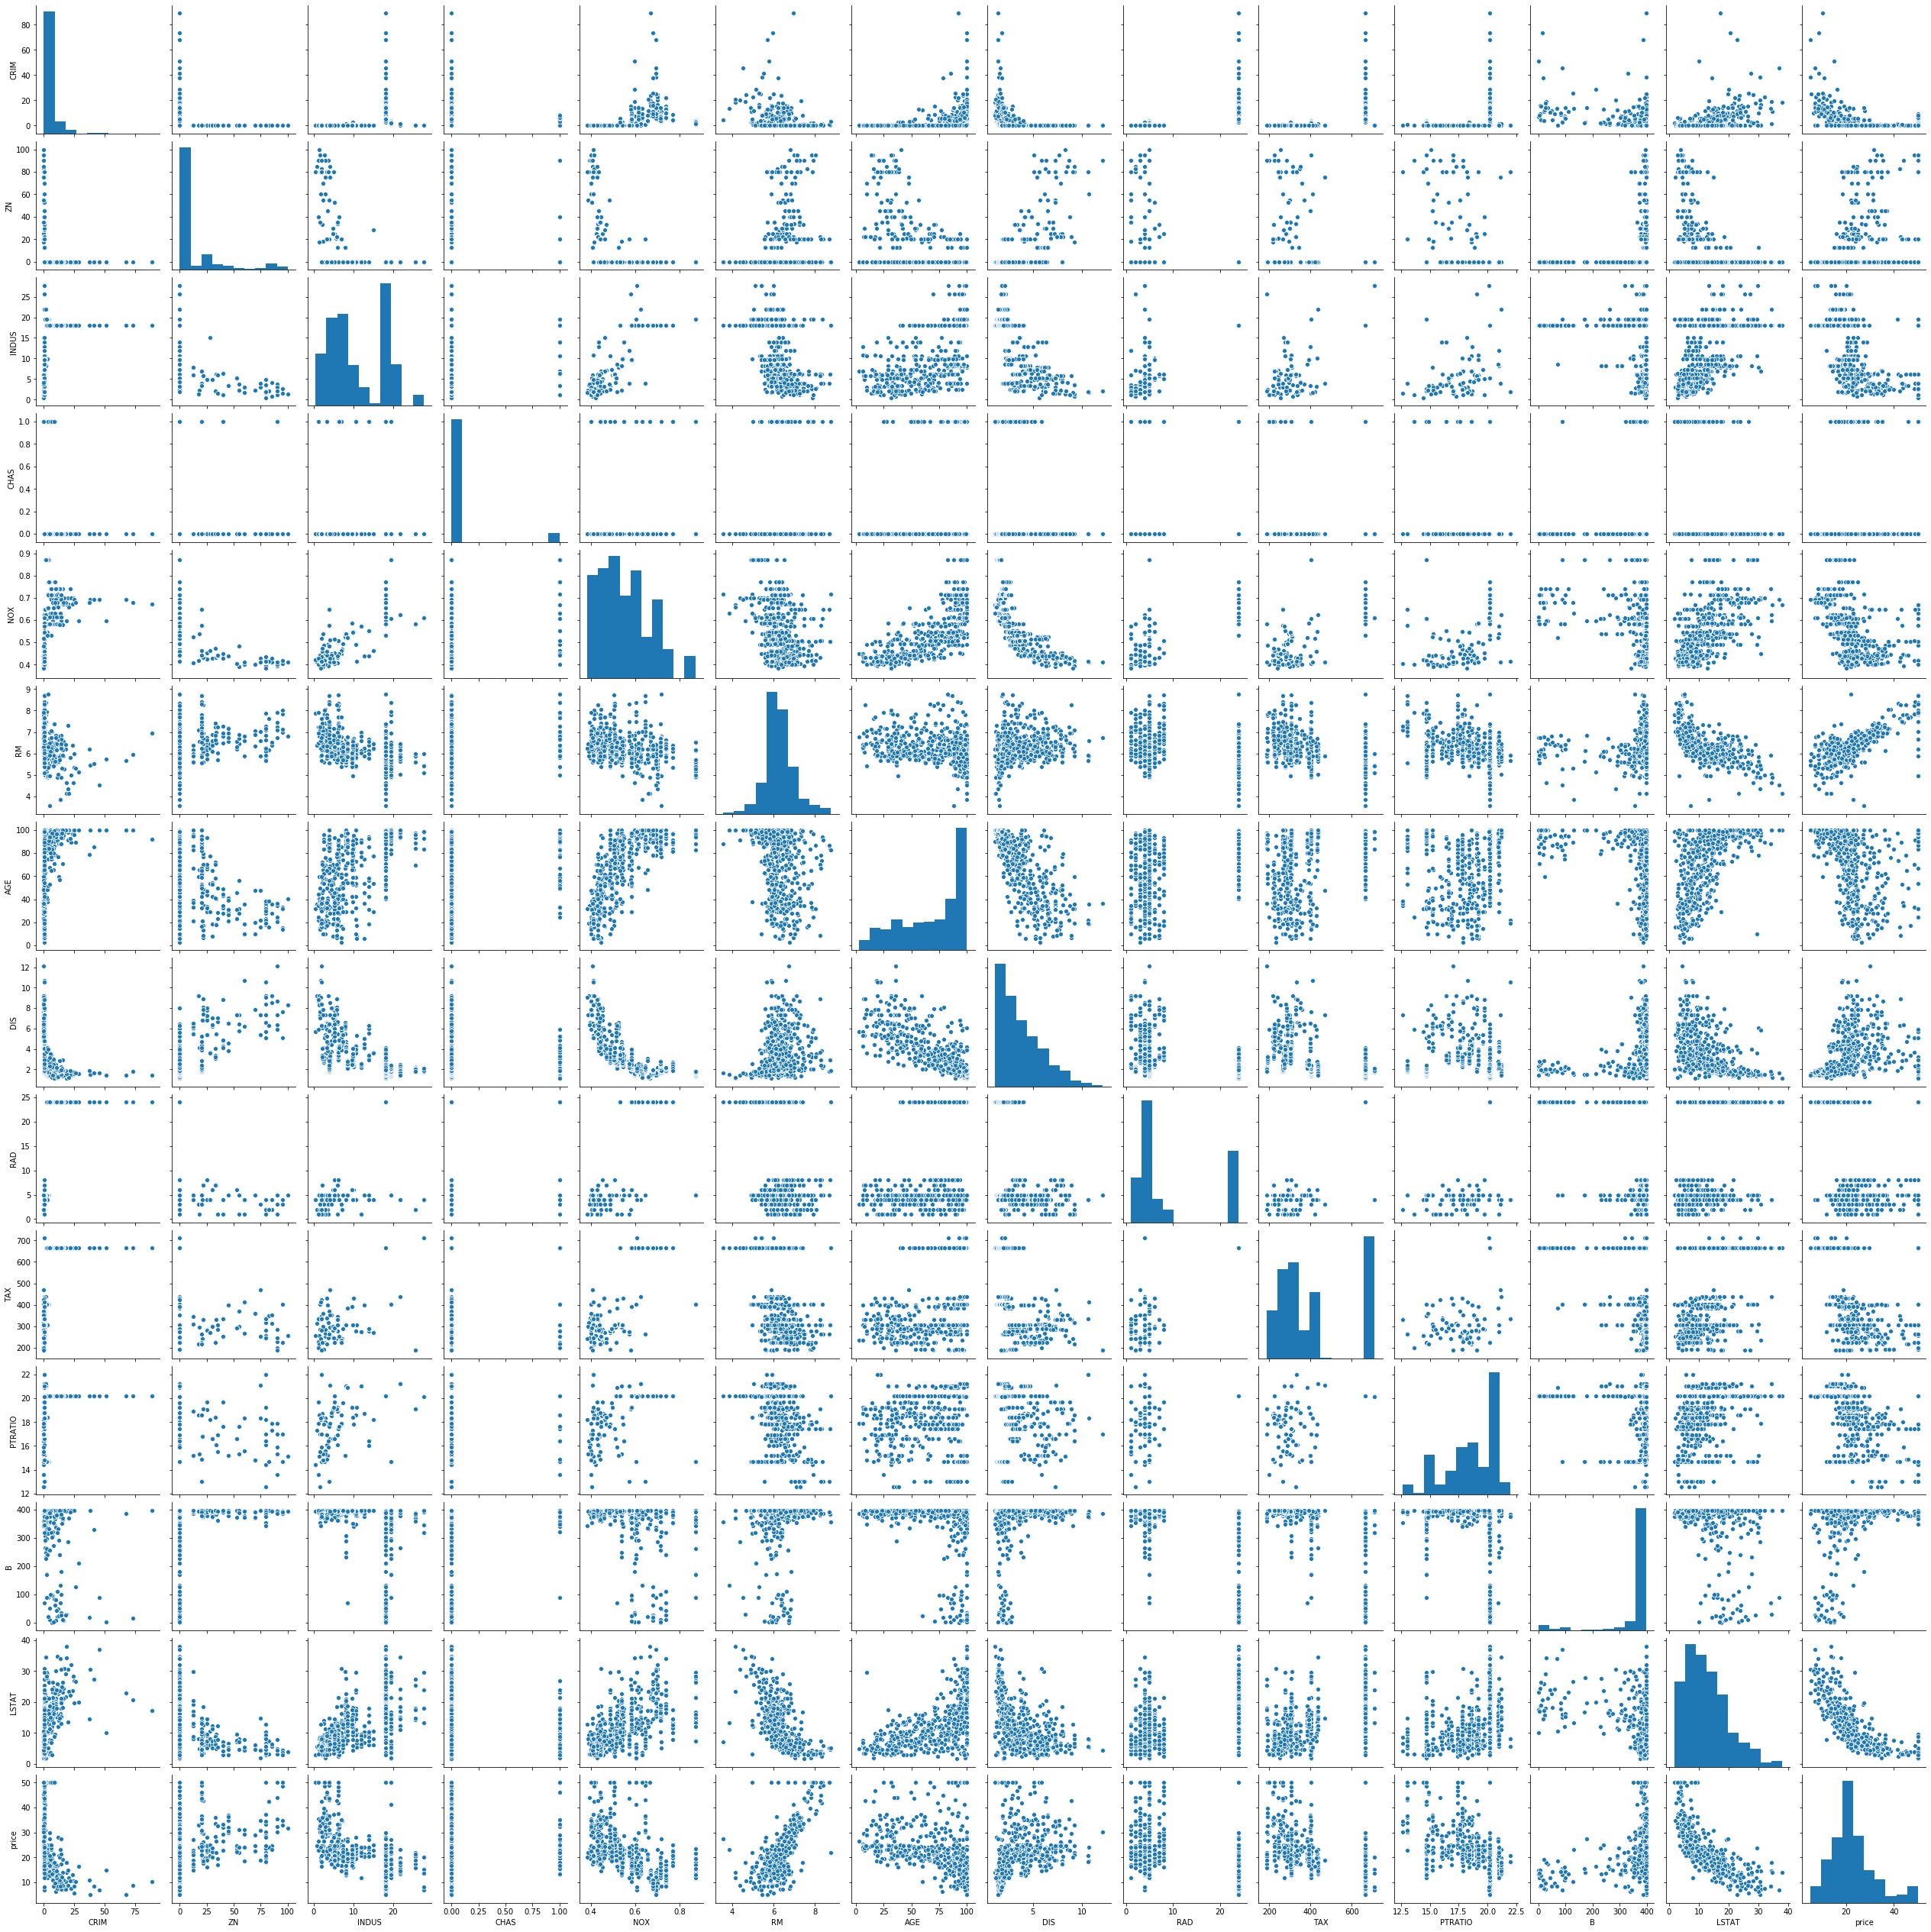

In [11]:
dd.scatter_plots(df, plot_mode='matrix')

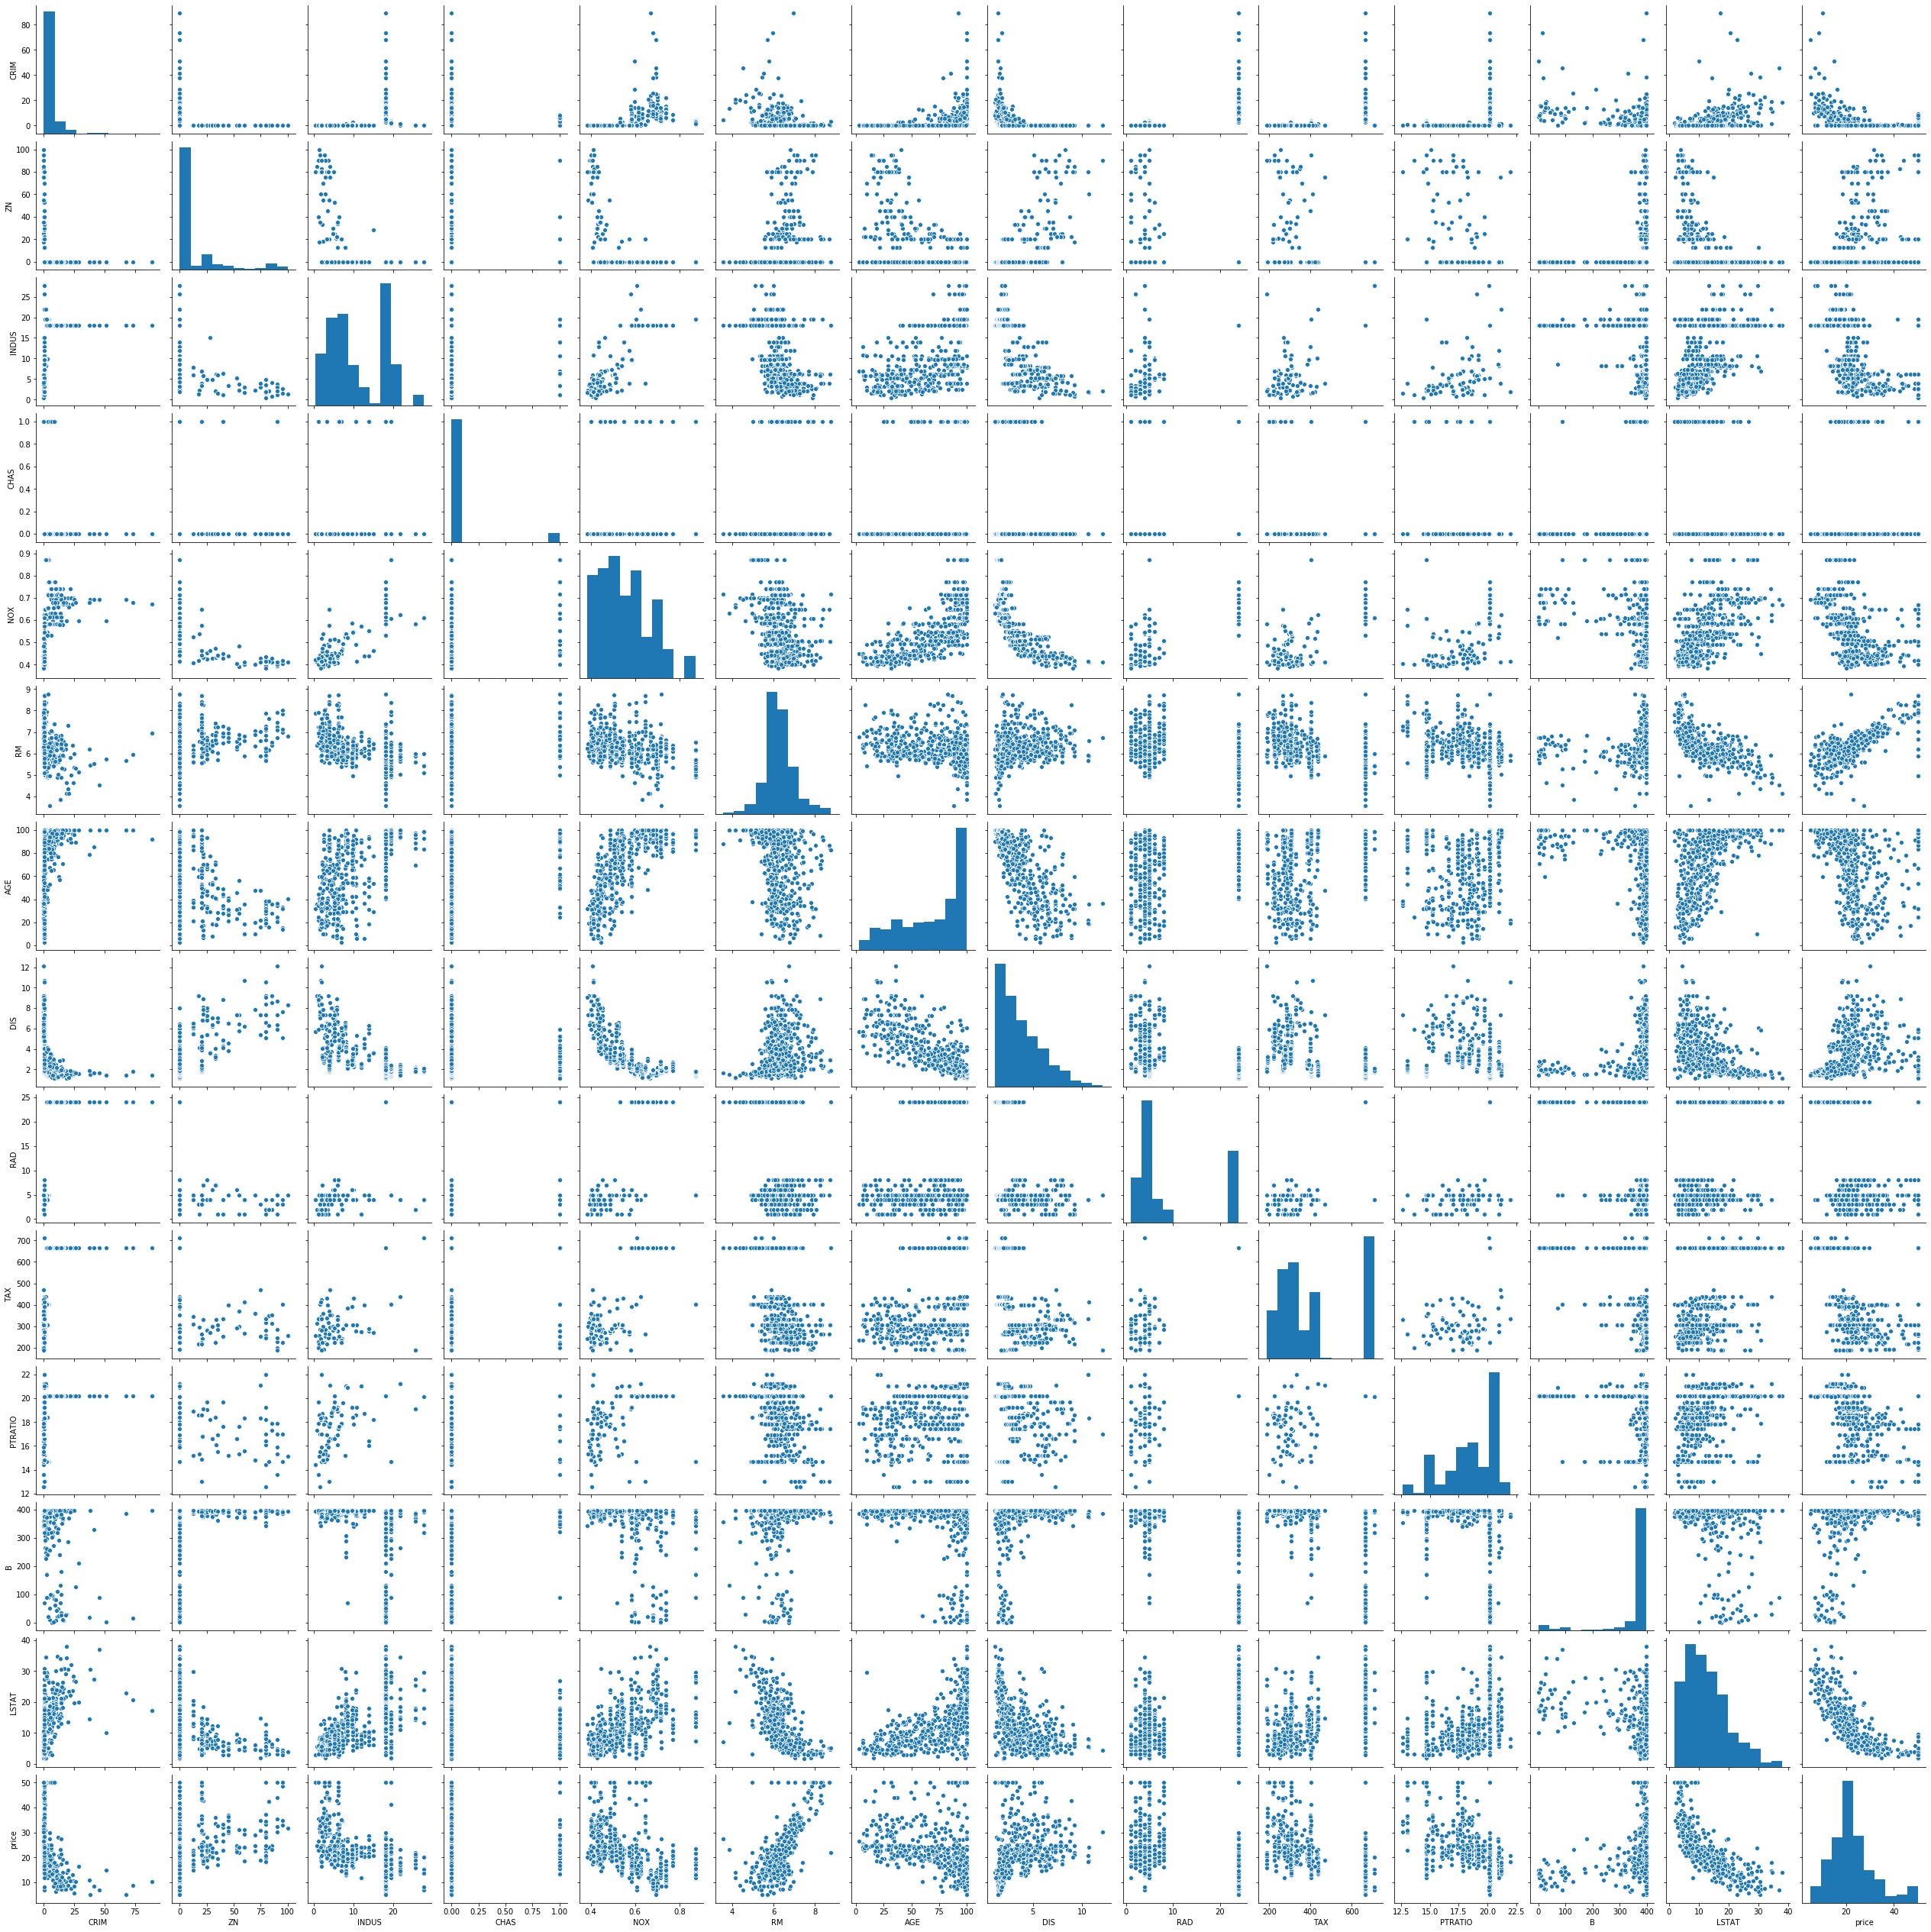

In [12]:
dd.scatter_plots(df, threshold={'Outlier': 0.9})

## Advanced Analysis
In addition to general plots, we can also use some advanced analyses as shown below.

### Cluster Analysis
What segments or groups are present in the data?

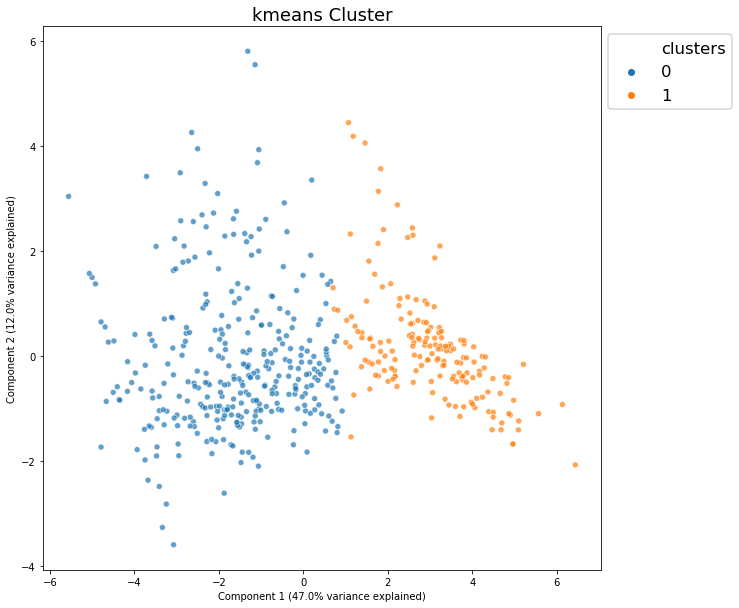

In [13]:
dd.cluster(df)

From this plot, we see that there does not appear to be strongly distinct clusters in the data.

### Feature Importance

Which features are most predictive of price? We use Random Forest as a baseline model to test for importance.

In [14]:
from sklearn.ensemble import RandomForestRegressor

Text(0.5, 1.0, 'Feature Importance')

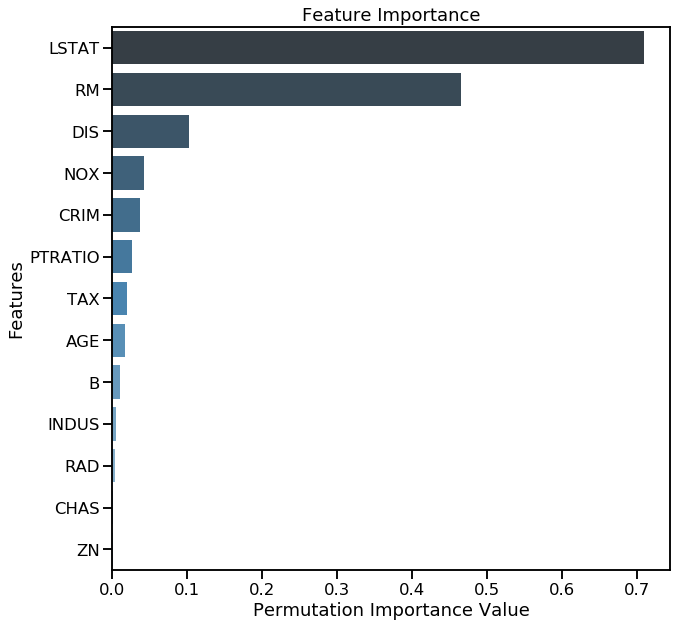

In [15]:
dd.importance(df, 'price', estimator=RandomForestRegressor(random_state=42))

It appears that `LSTAT` and `RM` are most important for predicting price.

### Topic Modeling
Since the Boston housing data set does not contain textual features, the 20 newsgroups text dataset is used to demonstrate the **Topic Modeling** widget.

In [16]:
from sklearn.datasets import fetch_20newsgroups

In [17]:
dat = fetch_20newsgroups(subset='test')
df2 = pd.DataFrame({'text': dat['data']})
df2 = df2.sample(150)

In [18]:
df2.head()

,text
1163,From: rstimets@silver.ucs.indiana.edu (robert ...
6189,Organization: University of Illinois at Chicag...
5903,From: lhighley@gozer.idbsu.edu (Larry Paul Hig...
2043,"From: grzheng@vax2.concordia.ca (ZHENG, GUO RO..."
3643,From: scott@hpcvccl.cv.hp.com (Scott Linn)\nSu...


Text preprocessing can be applied before topic modeling to improve accuracy.

In [19]:
from data_describe.text.text_preprocessing import preprocess_texts, bag_of_words_to_docs
processed = preprocess_texts(df2['text'])
text = bag_of_words_to_docs(processed)

In [20]:
from data_describe.text.topic_modeling import topic_model 

In [21]:
lda_model = topic_model(text, num_topics=3)
lda_model

,Topic 1,Topic 1 Coefficient Value,Topic 2,Topic 2 Coefficient Value,Topic 3,Topic 3 Coefficient Value
Term 1,even,0.017,something,0.017,use,0.016
Term 2,power,0.015,since,0.015,ca,0.014
Term 3,first,0.014,time,0.014,may,0.013
Term 4,control,0.013,going,0.014,never,0.013
Term 5,much,0.013,use,0.014,us,0.012
Term 6,work,0.012,say,0.014,windows,0.012
Term 7,problem,0.012,first,0.011,software,0.012
Term 8,go,0.011,find,0.011,new,0.012
Term 9,information,0.011,thanks,0.011,say,0.011
Term 10,way,0.011,work,0.011,even,0.011
